##PART--1 Project objective - Churn ML##

In [1]:
# system libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation 
import pandas as pd
import numpy as np
import pandas

# Data visualization 
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt 
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette = 'viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" -v -iv

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Author: Library versions

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

numpy     : 1.24.3
plotly    : 5.22.0
matplotlib: 3.9.1
pandas    : 2.2.2
watermark : 2.4.3
seaborn   : 0.13.2
re        : 2.2.1



Part2 -Database

In [2]:
# Database
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# viewing the data first five data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Viewing last 5 data
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Rows and columns
data.shape

(7043, 21)

In [6]:
# Data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Data type
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Part 2.1- Exploratory data analysis

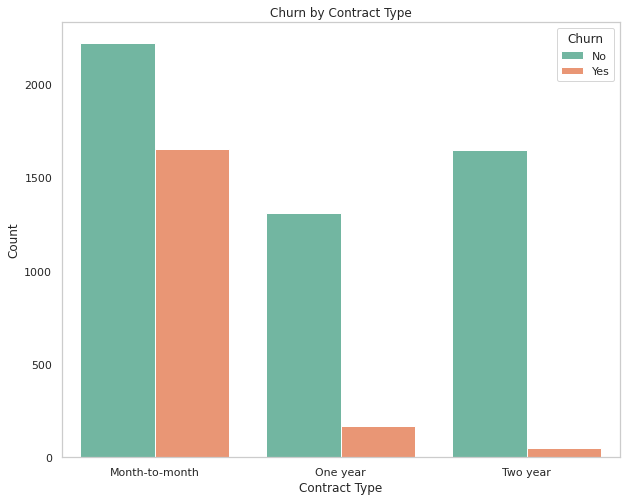

In [13]:
# Churn Count by contract type
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.grid(False)
plt.show()

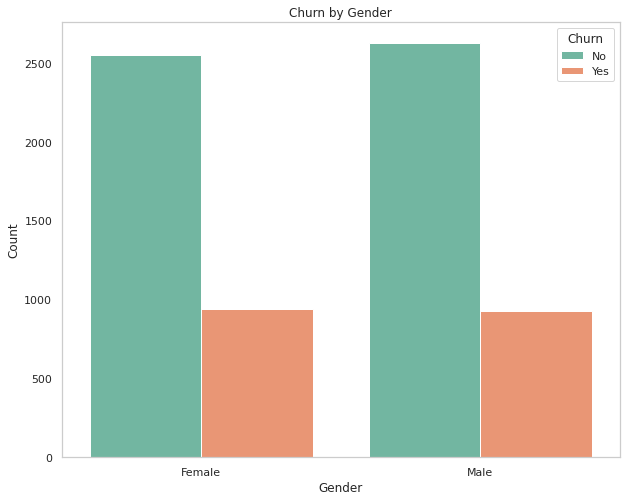

In [16]:
# churn count by gender
plt.figure(figsize=(10,8))
sns.countplot(x='gender', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(False)
plt.show()

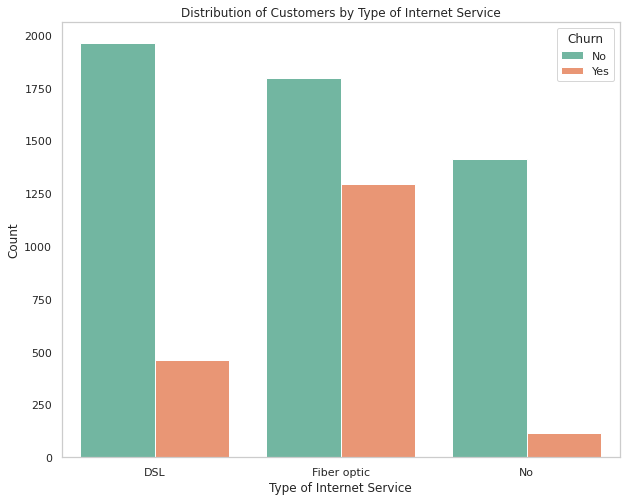

In [20]:
# churn rate varies by Internet Servies
plt.figure(figsize=(10, 8))
sns.countplot(x='InternetService', hue='Churn', data=data, palette="Set2")
plt.title('Distribution of Customers by Type of Internet Service')
plt.xlabel('Type of Internet Service')
plt.ylabel('Count')
plt.grid(False)
plt.show()

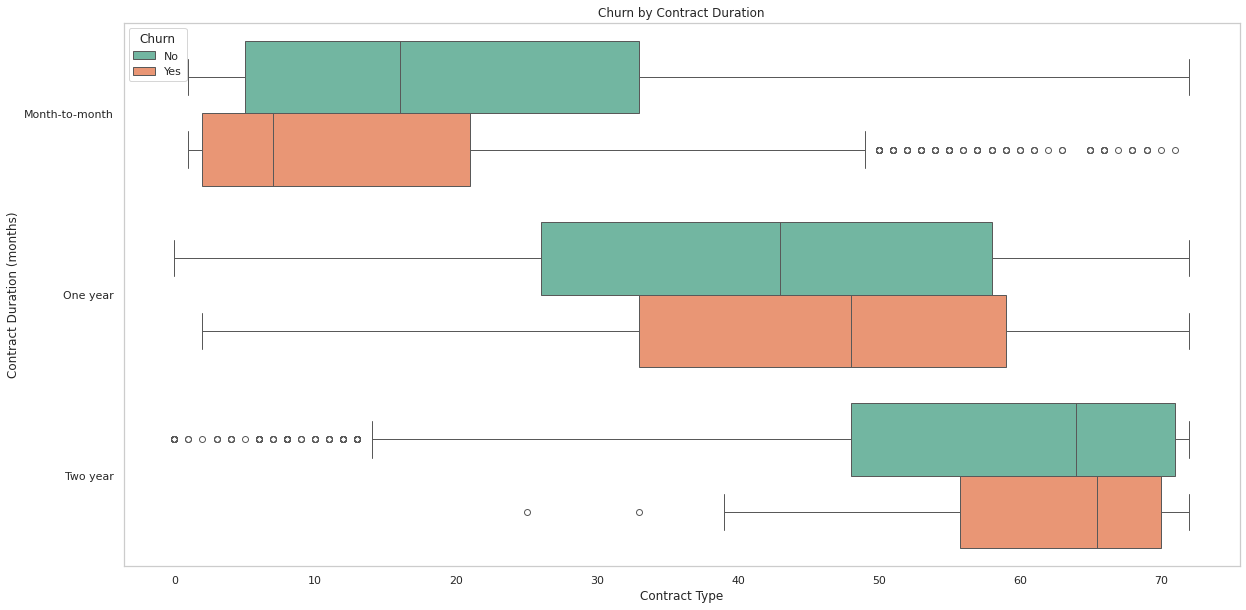

In [24]:
# churn distribution by contract duration 
plt.figure(figsize=(20, 10))

sns.boxplot(x='tenure', y = 'Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Contract Duration')
plt.xlabel('Contract Type')
plt.ylabel('Contract Duration (months)')
plt.grid('off')
plt.grid(False)
plt.show()

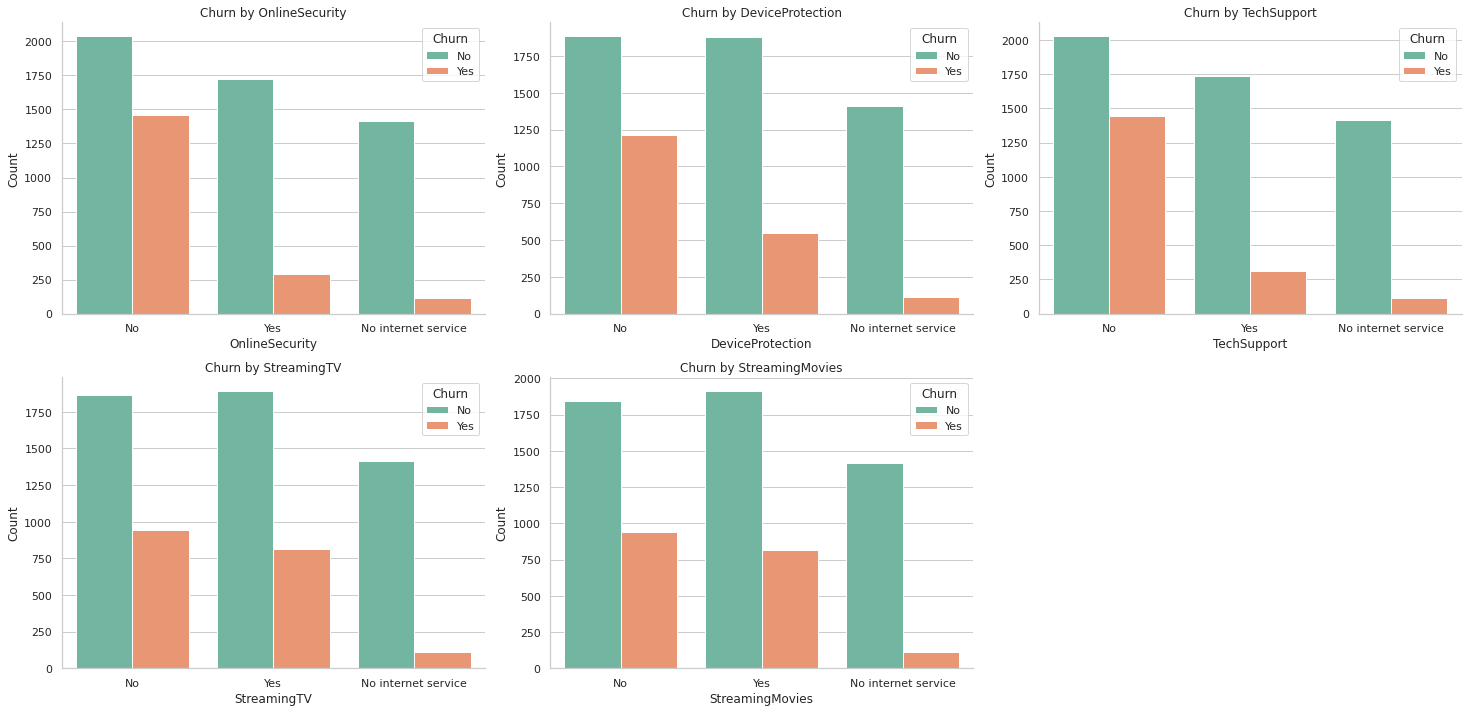

In [33]:
# Churn count additional services
additional_services = ['OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

plt.figure(figsize=(20.5, 10))
for i, service in enumerate(additional_services, 1):
    plt.subplot(2,3, i)
    sns.countplot(x=service, hue='Churn', data=data, palette='Set2')
    plt.title(f"Churn by {service}")
    plt.xlabel(service)
    plt.ylabel('Count')
    sns.despine()
    plt.tight_layout()
plt.show()

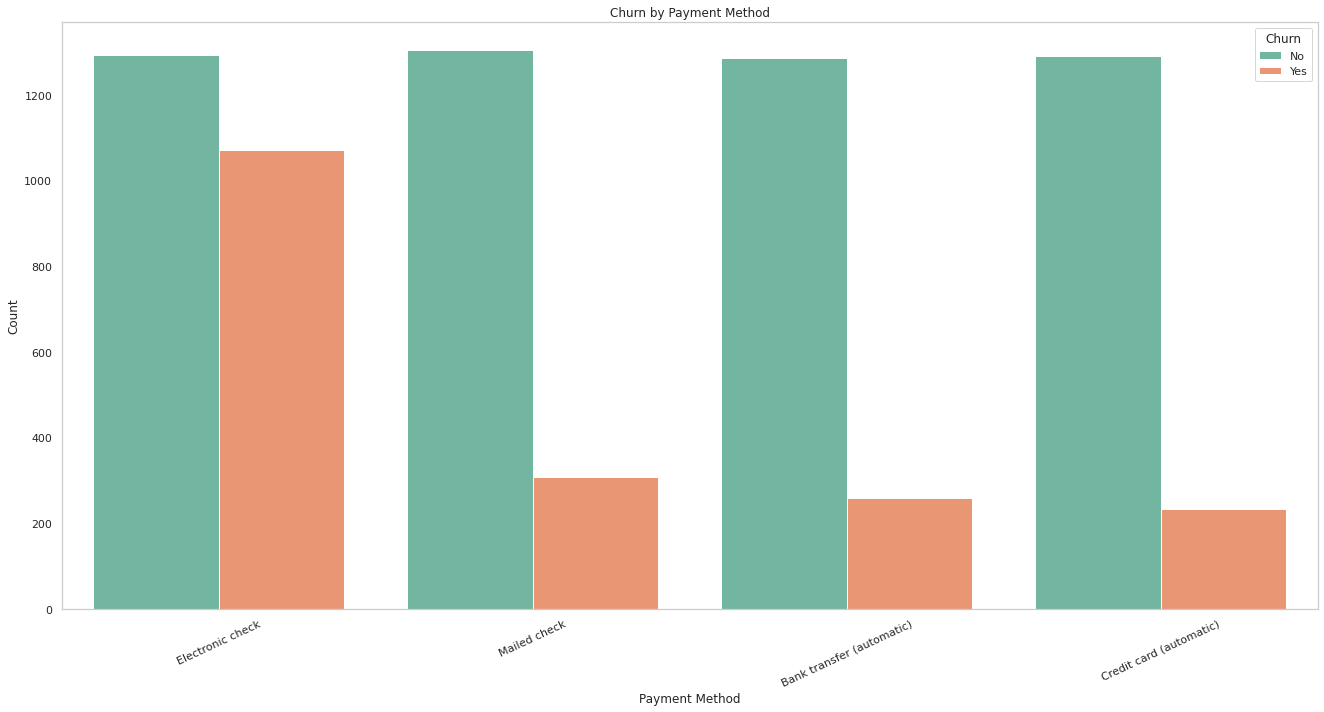

In [38]:
# Churn count by payment method
plt.figure(figsize=(18.5, 10))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.tight_layout()
plt.grid(False)
plt.show()

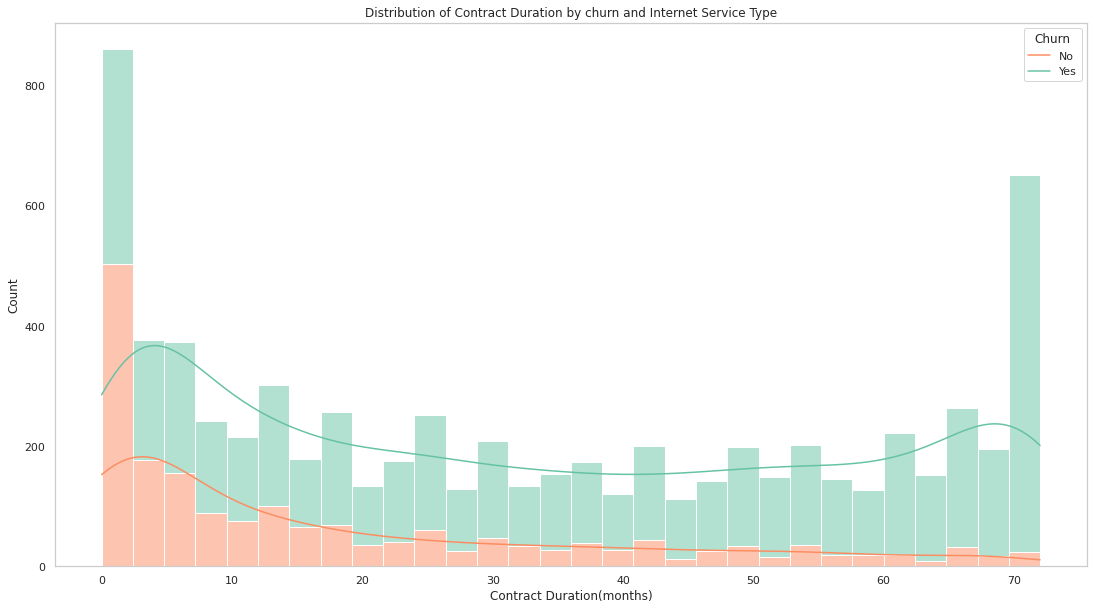

In [39]:
plt.figure(figsize=(18.5, 10))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, multiple='stack', palette='Set2', bins=30)
plt.title('Distribution of Contract Duration by churn and Internet Service Type')
plt.xlabel('Contract Duration(months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

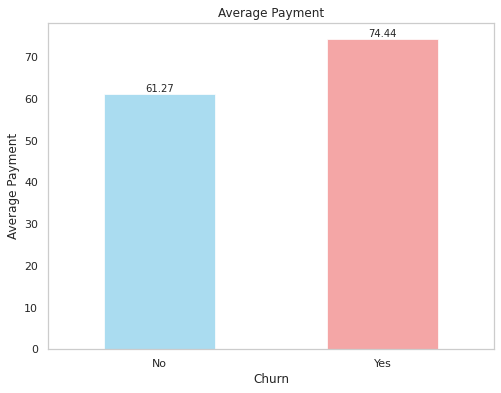

In [46]:
# calculate average monthly charges by churn 
media_pagamentos = data.groupby('Churn')['MonthlyCharges'].mean()

# plotting the bar chart
plt.figure(figsize=(8, 6))
media_pagamentos.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)

# Customizing the chart
plt.title('Average Payment')
plt.xlabel('Churn')
plt.ylabel('Average Payment')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Displaying the average values on the bars
for i in range(len(media_pagamentos)):
    plt.text(i, media_pagamentos.iloc[i], f"{media_pagamentos.iloc[i]:.2f}", ha='center', va='bottom')
plt.grid(False)
plt.show()